# Necessary Libraries:

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset:

In [119]:
df = pd.read_csv("haberman.csv",names=["Patient's Age","Year of operation","No.of auxillary nodes","Result"])
df.head() # reading the sample data

,Patient's Age,Year of operation,No.of auxillary nodes,Result
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### As data of year is in 1900 adding 1900 to year column

In [120]:
df["Year of operation"] = df["Year of operation"]+1900
df.head()

,Patient's Age,Year of operation,No.of auxillary nodes,Result
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [121]:
df.columns # Seeing all column headers

Index(['Patient's Age', 'Year of operation', 'No.of auxillary nodes',
       'Result'],
      dtype='object')

## Datapoints and features:

In [122]:
df.shape 

(306, 4)

In [123]:
df.describe() ## Some insights of the data

,Patient's Age,Year of operation,No.of auxillary nodes,Result
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


## value counts of each class in output label

In [124]:
df["Result"].value_counts()

## 1 - survived >5 years
## 2 - died within 5 years

1    225
2     81
Name: Result, dtype: int64

## 2D scatter plot

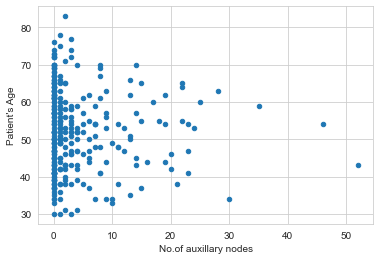

In [125]:
df.plot(kind="scatter",x="No.of auxillary nodes",y="Patient's Age")
plt.show()

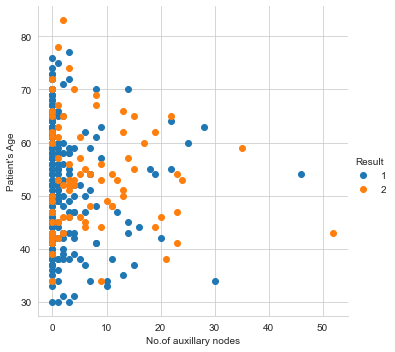

In [126]:
# For better Visualization

sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Result",height=5)\
    .map(plt.scatter,"No.of auxillary nodes","Patient's Age")\
    .add_legend()

plt.show();

## Observations:
1. As year of operation may not be necessary for predicting the result, just analyzing the other 2 columns w.r.t result
2. Even the no. of auxillary nodes is between 0-10, death rate <5 yrs is having more occurences but the survival rate is high for people having <10 nodes
3. But if the count of auxillary nodes is >10, there are more chances of dying within 5 yrs of operation

## Pairplot: (for comparing each column with other column data)
### will come under (bivariate analysis)

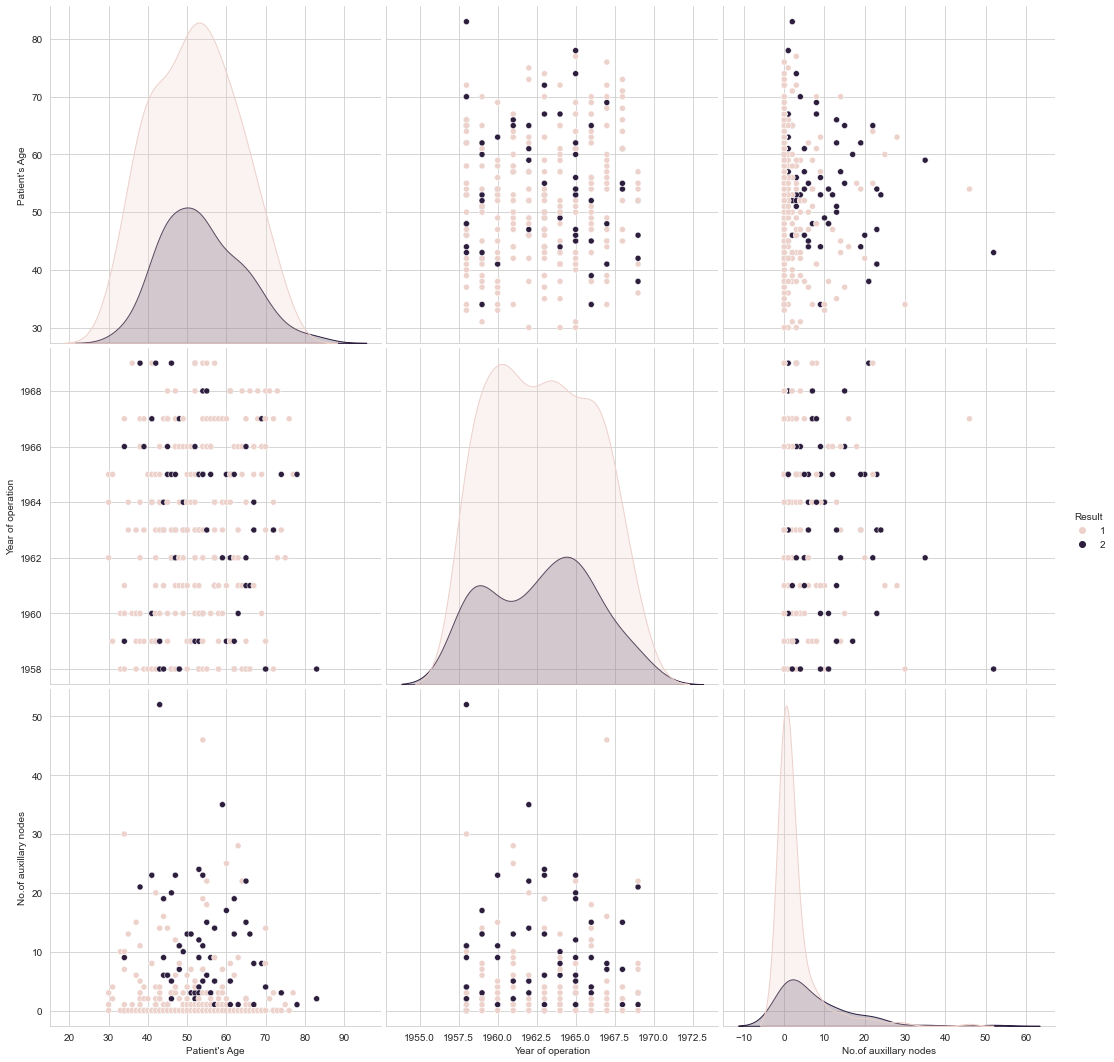

In [127]:
plt.close()
sns.set_style("whitegrid")
## no.of plots = 3c2 = 3!/2! = 3
sns.pairplot(df,hue="Result",height = 5)
plt.show()

## Observations:
1. pdf curves of all the feature data are almost equal to the gaussian bell curve and we can say the data is enoughly following Normal distrubution
2. At the starting years the patients count was more compared to later, may be reduced due to sophisticated medicinal cure 
3. If the no.of axillary nodes are equal to 0 then most of them survived after the operation
4. But as in each case as the curves for both result-1 and result-2 are overlapping much, its very hard to interpret the conclusions through normal if else statements and may land in wrong prediction of output
5. If axillary nodes ==0 then may be there is more probability of survival
6. If axillary nodes count is more than 20 then there is high chance of dying less than 5 yrs

## Histogram, PDF, CDF (will fall under univariate analysis)

In [128]:
df_survival_gr_5y = df[df["Result"] == 1]
df_died_ls_5y = df[df["Result"] == 2]
len(df_survival_gr_5y)+len(df_died_ls_5y) # to validate whether the data matches after split

306

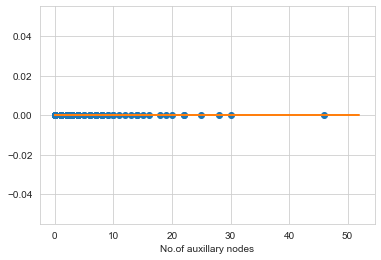

In [129]:
plt.plot(df_survival_gr_5y["No.of auxillary nodes"],np.zeros_like(df_survival_gr_5y["No.of auxillary nodes"]),'o')
plt.plot(df_died_ls_5y["No.of auxillary nodes"],np.zeros_like(df_died_ls_5y["No.of auxillary nodes"]))
plt.xlabel("No.of auxillary nodes")
plt.show() ## There are many overlaps and cant be able to distinguish on basis of axillary nodes

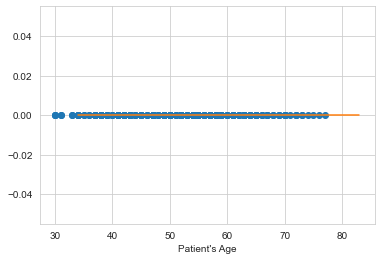

In [130]:
plt.plot(df_survival_gr_5y["Patient's Age"],np.zeros_like(df_survival_gr_5y["Patient's Age"]),'o')
plt.plot(df_died_ls_5y["Patient's Age"],np.zeros_like(df_died_ls_5y["Patient's Age"]))
plt.xlabel("Patient's Age")
plt.show()## There are many overlaps and cant be able to distinguish on basis of parents age

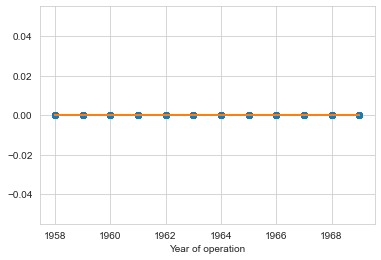

In [131]:
plt.plot(df_survival_gr_5y["Year of operation"],np.zeros_like(df_survival_gr_5y["Year of operation"]),'o')
plt.plot(df_died_ls_5y["Year of operation"],np.zeros_like(df_died_ls_5y["Year of operation"]))
plt.xlabel("Year of operation")
plt.show() ## There are many overlaps and cant be able to distinguish on basis of Year of operation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


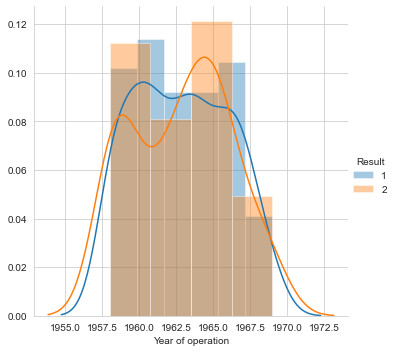

In [132]:
sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"Year of operation")\
.add_legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


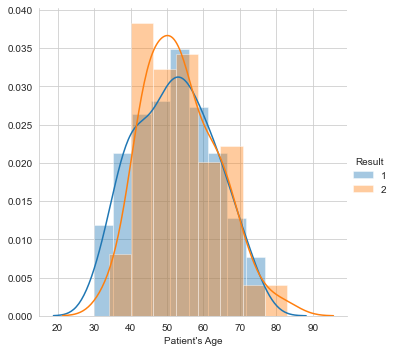

In [133]:
sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"Patient's Age")\
.add_legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


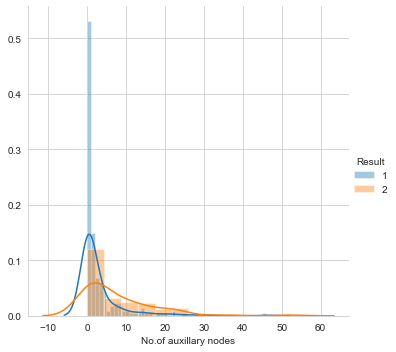

In [134]:
sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"No.of auxillary nodes")\
.add_legend()

plt.show()

## Plotting cdf curve for understanding the percentages of data

In [135]:
df.columns

Index(['Patient's Age', 'Year of operation', 'No.of auxillary nodes',
       'Result'],
      dtype='object')

In [136]:
df_survival_gr_5y["Patient's Age"].max() # -> 77
df_survival_gr_5y["Patient's Age"].min()# -> 30 
## Now between 30 and 77 -> 77-30=47 -> 47/10= 4.7, so bin will be formed with 4.7 width each
## eg: 30 - 34.7 will fall as 1 bin and freq of this will be plotted on y axis
## As we are plotting cdf and pdf we have control over only 1 axis - i.e; x-axis
## So in order to say the data who got survived > 5y, directly we have to take df_survival_gr_5y
# instead of normal df

30

Text(0, 0.5, 'Probability')

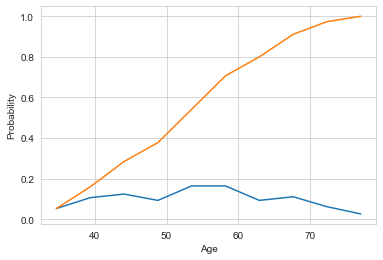

In [137]:
counts, bin_edges = np.histogram(df_survival_gr_5y["Patient's Age"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.ylabel("Probability")
## Now we can say like 80% of the survival>5yrs are having age<=63

Text(0, 0.5, 'Probability')

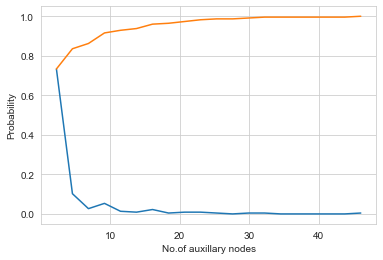

In [138]:
## np.histogram is a great function for calculating the pdf and cdf curves
counts, bin_edges = np.histogram(df_survival_gr_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("No.of auxillary nodes")
plt.ylabel("Probability")
## More the bins more the resolution it comes and the graph will somewhat changes to accurate
## because we are chunking the dataset more and touching almost another 10 sets of data
## we can say from this graph like, 90% of the people are having <10 axillary nodes
## and have survived after the operation

Text(0, 0.5, 'Probability')

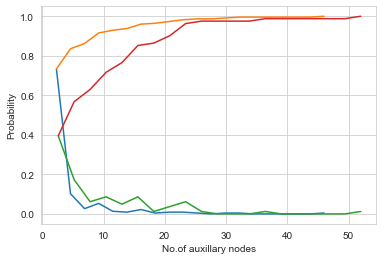

In [139]:
counts, bin_edges = np.histogram(df_survival_gr_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("No.of auxillary nodes")
plt.ylabel("Probability")
counts, bin_edges = np.histogram(df_died_ls_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("No.of auxillary nodes")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

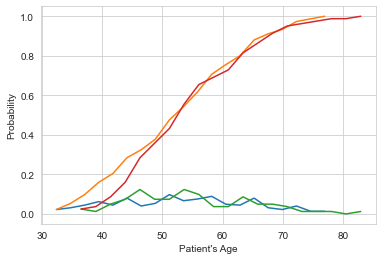

In [140]:
counts, bin_edges = np.histogram(df_survival_gr_5y["Patient's Age"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Patient's Age")
plt.ylabel("Probability")

counts, bin_edges = np.histogram(df_died_ls_5y["Patient's Age"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Patient's Age")
plt.ylabel("Probability")

In [141]:
print("means:")
print(df_survival_gr_5y["No.of auxillary nodes"].mean())
print(df_died_ls_5y["No.of auxillary nodes"].mean())
print("stds:")
print(df_survival_gr_5y["No.of auxillary nodes"].std())
print(df_died_ls_5y["No.of auxillary nodes"].std())

## so most of axillary nodes data for patients survival >5 yrs lies in 2.79+5.87, 2.79-5.87

means:
2.7911111111111113
7.45679012345679
stds:
5.870318127719728
9.185653736555782


In [142]:
print("medians:")
print(df_survival_gr_5y["No.of auxillary nodes"].median())
print(df_died_ls_5y["No.of auxillary nodes"].median())
## Median is 0 in first case as its the survival rate and we have seen that having 0 axillary
# nodes having more survival rate

medians:
0.0
4.0


In [143]:
print("Quantiles:")
print(np.percentile(df_survival_gr_5y["No.of auxillary nodes"],np.arange(0,100,25)))
print(np.percentile(df_died_ls_5y["No.of auxillary nodes"],np.arange(0,100,25)))

## [0 0 0 3] -> means 0th percentile of data having 0 axillary nodes

## 25th, 50th percentile of the data having 0 axillary nodes

## 75th percentile( 3/4 th) of data having 0-3 axillary nodes

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


# Box plot:

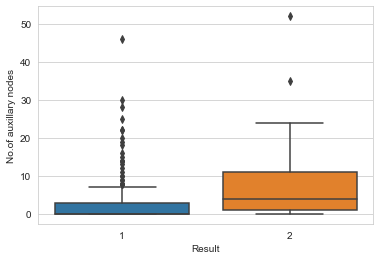

In [144]:
sns.boxplot(x='Result',y='No.of auxillary nodes', data=df)
plt.show()

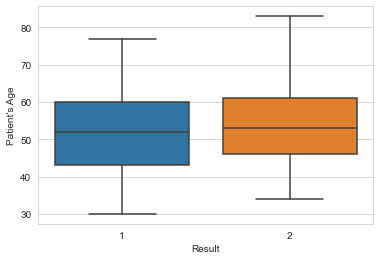

In [145]:
sns.boxplot(x='Result',y='Patient\'s Age', data=df)
plt.show()

## patients Age>77, irrespective of the axillary nodes, mostly have died within less than 5 yrs of operation
## patients Age<35, mostly have survived irrespective of the axillary nodes

# Violin plot: 

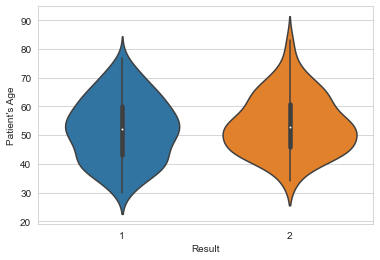

In [146]:
sns.violinplot(x="Result", y="Patient\'s Age", data=df, size=8)
plt.show()

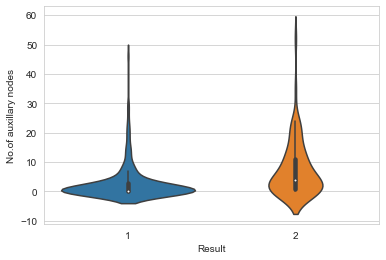

In [147]:
sns.violinplot(x='Result',y='No.of auxillary nodes', data=df, size=8)
plt.show()

# Multivariate analysis(countours)

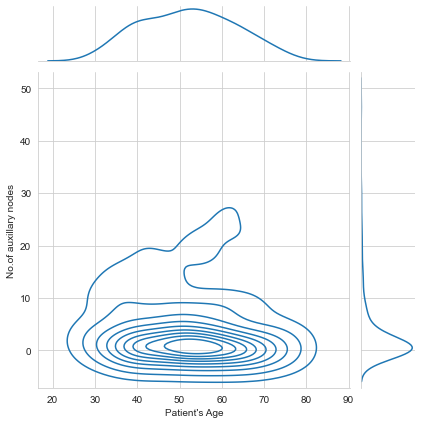

In [149]:
sns.jointplot(x='Patient\'s Age',y='No.of auxillary nodes', data=df_survival_gr_5y, kind="kde");
plt.show();

## For multivariate analysis, we can see the density is more in middle and causing a peak at middle